# $t\bar{t}$ proposal

**Goal:** Let's see if $t\bar{t}$ normalization NPs improve the post-fit agreement!


### Notation

- $D^{SR4b}$: 4b data (prediction) in the SR
- $R^{CR}$: $2b \rightarrow 4b$ NN rw, derived in the CR
- $D^{SR 2b}$: 2b data in the SR
- $D^{SR 2b}_{QCD}$: the QCD component of our SR in 2b data
- $D^{SR 2b}_{tt}$: the $t\bar{t}$ component of our SR in 2b data
- $MC^{}$

## Signal region fit

\begin{eqnarray}
D^{SR4b} &=& R^{CR}(D^{SR2b}) \times N^{CR} \\
&=& R^{CR}(D^{SR2b}_{QCD} + D^{SR2b}_{t\bar{t}}) \times N^{CR} \\
&=& R^{CR}(D^{SR2b}_{QCD})\times N^{CR} + R^{CR}(D^{SR2b}_{t\bar{t}}) \times N^{CR}
\end{eqnarray}

### What Sean showed

- All-had $t\bar{t}$:
\begin{equation}
R^{CR}(MC^{CR2b}_{ah \ t\bar{t}}) \times N^{CR} = 2.28 \times MC_{ah \ t\bar{t}}^{SR4b}
\end{equation}

- Semilep $t\bar{t}$:

\begin{equation}
R^{CR}(MC^{CR2b}_{sl \ t\bar{t}}) \times N^{CR} = 3.40 \times MC_{sl \ t\bar{t}}^{SR4b}
\end{equation}

But... the shapes were matching super well, I j didn't like how this ad hoc normalization correction needed to be injected in the test when we don't have any notion of this type of flexibility in the SR fit.


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
os.sys.path+= ['../RRevolution/code/','../PAG-opt/','../code/']
from analysis import getXhh
from utils import mcToYr, L

from eventDisplays import rainbow_text

from plots import draw_SR, draw_VR, draw_CR

import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
figDir = 'figures/ttbar/rings'

**Step 1:** Load in the samples. Let's start w/ 2016, b/c some the 2017 sample isn't ready yet, and 2018 is huge!!

In [3]:
yr = 16
mc = 'mc16a'

In [77]:
cols = ['pass_vbf_sel','ntag','njets','X_hh','kinematic_region','m_hh','minQ','X_wt_tag','dEta_hh','passMuonIso']
# dEta_hh, X_wt_no_tag

#for target in ['4b','3b1l','3b1f']:
target = '3b1l'   
i = target.replace('b','')
cols += [f'NN_d2{i}_weight_bstrap_med_{yr}',
         f'NN_d2{i}_weight_bstrap_IQR_{yr}',
         f'rw_to_{target}',
         f'NN_d2{i}_weight_VRderiv_bstrap_med_{yr}',
         f'NN_d2{i}_weight_VRderiv_bstrap_IQR_{yr}']

In [5]:
fDir = '../data/RR/cryptotuples/ggF_rw_pre_Xwt/'
trees = ['sig','validation','control']

In [6]:
with uproot.open(f'{fDir}/NanoNTuple_allhad_{mc}_NN_100_bootstraps.root') as f:
    
    ah = pd.concat([f[tree].arrays(cols+['mc_sf'],library='pd') for tree in trees])
    
    # Scale by lumi
    ah['mc_sf'] *= L[yr]
    
    #for target in ['4b','3b1l','3b1f']:
        
    i = target.replace('b','')
    blabel = '' if target == '4b' else f'_{target}'

    norm    = f[f'NN_norm{blabel}_bstrap_med_{yr}'].all_members['fVal']
    norm_VR = f[f'NN_norm{blabel}_bstrap_med_{yr}'].all_members['fVal']

    ah[f'w_2{i}']    = norm    * ah[f'NN_d2{i}_weight_bstrap_med_{yr}']        
    ah[f'w_2{i}_VR'] = norm_VR * ah[f'NN_d2{i}_weight_VRderiv_bstrap_med_{yr}'] 

    

In [7]:
with uproot.open(f'{fDir}/NanoNTuple_semilep_{mc}_NN_100_bootstraps.root') as f:
    
    sl = pd.concat([f[tree].arrays(cols+['mc_sf'],library='pd') for tree in trees])
    
    # Scale by lumi
    sl['mc_sf'] *= L[yr]
    
    #for target in ['4b','3b1l','3b1f']:
        
    i = target.replace('b','')
    blabel = '' if target == '4b' else f'_{target}'

    norm    = f[f'NN_norm{blabel}_bstrap_med_{yr}'].all_members['fVal']
    norm_VR = f[f'NN_norm{blabel}_bstrap_med_{yr}'].all_members['fVal']

    sl[f'w_2{i}']    = norm    * sl[f'NN_d2{i}_weight_bstrap_med_{yr}']        
    sl[f'w_2{i}_VR'] = norm_VR * sl[f'NN_d2{i}_weight_VRderiv_bstrap_med_{yr}'] 


In [8]:
with uproot.open(f'{fDir}/data{yr}_NN_100_bootstraps.root') as f:
    
    dat = pd.concat([f[tree].arrays(cols,library='pd') for tree in trees])
    
    #for target in ['4b','3b1l','3b1f']:
        
    i = target.replace('b','')
    blabel = '' if target == '4b' else f'_{target}'

    norm    = f[f'NN_norm{blabel}_bstrap_med_{yr}'].all_members['fVal']
    norm_VR = f[f'NN_norm_VRderiv{blabel}_bstrap_med_{yr}'].all_members['fVal']

    dat[f'w_2{i}']    = norm    * dat[f'NN_d2{i}_weight_bstrap_med_{yr}']        
    dat[f'w_2{i}_VR'] = norm_VR * dat[f'NN_d2{i}_weight_VRderiv_bstrap_med_{yr}'] 


In [9]:
nbins = 25
r = (0,10)
lw=2.5

In [10]:
dat.columns

Index(['pass_vbf_sel', 'ntag', 'njets', 'X_hh', 'kinematic_region', 'm_hh',
       'minQ', 'X_wt_tag', 'passMuonIso', 'NN_d24_weight_bstrap_med_16',
       'NN_d24_weight_bstrap_IQR_16', 'rw_to_4b',
       'NN_d24_weight_VRderiv_bstrap_med_16',
       'NN_d24_weight_VRderiv_bstrap_IQR_16', 'w_24', 'w_24_VR'],
      dtype='object')

In [46]:
cis = ['pass_vbf_sel', 'ntag', 'njets', 'X_hh', 'kinematic_region', 'm_hh',
       'dEta_hh','minQ', 'X_wt_tag','mc_sf']

In [65]:
sm_name  = f'../../hh4b/hh4b-resolved-reconstruction/SMNR_pythia_{mc}.root'

cis = ['pass_vbf_sel', 'ntag', 'njets', 'X_hh', 'kinematic_region', 'm_hh',
       'dEta_hh','minQ', 'X_wt_tag','mc_sf']

with uproot.open(sm_name) as f:
    
    sm = pd.concat([f[tree].arrays(cis,library='pd') for tree in trees])
    
    # Scale by lumi
    sm['mc_sf'] *= L[yr]
    



In [20]:
mc

'mc16a'

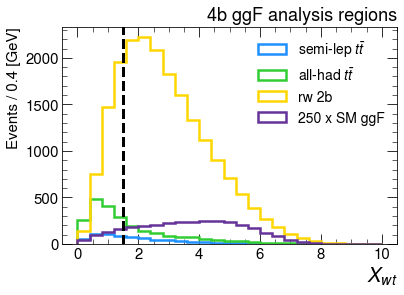

In [31]:
sl_mask = (sl.ntag >= 4) & ~ sl.pass_vbf_sel
ah_mask = (ah.ntag >= 4) & ~ ah.pass_vbf_sel
sm_mask = (sm.ntag >= 4) & ~ sm.pass_vbf_sel


plt.hist(sl.loc[sl_mask,'X_wt_tag'],nbins,r,histtype='step',color='dodgerblue',
         lw=lw,label=r'semi-lep $t\bar{t}$',
         weights=sl.loc[sl_mask,'mc_sf'])

plt.hist(ah.loc[ah_mask,'X_wt_tag'],nbins,r,histtype='step',color='limegreen',
         lw=lw,label=r'all-had $t\bar{t}$',weights=ah.loc[ah_mask,'mc_sf'])

plt.hist(dat.loc[dat.rw_to_4b,'X_wt_tag'],nbins,r,histtype='step',color='gold',
         lw=lw,label='rw 2b',weights=dat.loc[dat.rw_to_4b,f'w_2{i}'])

plt.xlabel('$X_{wt}$',fontsize=20,x=1,ha='right')
bw = r[1]/nbins
plt.ylabel(f'Events / {bw} [GeV]',fontsize=15,y=1,ha='right')
plt.legend()

ylim = plt.ylim()
plt.plot([1.5]*2,ylim,'k--',lw=lw)
plt.ylim(ylim)

plt.title('4b ggF analysis regions',loc='right')
plt.savefig(f'{figDir}/X_wt_tag.pdf',bbox_inches='tight')


scale = 250
plt.hist(sm.loc[sm_mask,'X_wt_tag'],nbins,r,histtype='step',color='rebeccapurple',
         lw=lw,label=f'{scale} x SM ggF',weights=scale*sm.loc[sm_mask,f'mc_sf'])
plt.legend()

plt.savefig(f'{figDir}/X_wt_tag_250x_sm.pdf',bbox_inches='tight')

In [34]:
Xhh_edgs = [0,.95,1.6]
eta_edgs = [0, .75, 1.5]
log=True

In [35]:
text = "$\mathbf{ATLAS}$ Data"+f" 20{yr} Internal\n"
text += "min_dR, NR bkts, SR (124,117)"

In [52]:
cols

['pass_vbf_sel',
 'ntag',
 'njets',
 'X_hh',
 'kinematic_region',
 'm_hh',
 'minQ',
 'X_wt_tag',
 'dEta_hh',
 'passMuonIso',
 'NN_d24_weight_bstrap_med_16',
 'NN_d24_weight_bstrap_IQR_16',
 'rw_to_4b',
 'NN_d24_weight_VRderiv_bstrap_med_16',
 'NN_d24_weight_VRderiv_bstrap_IQR_16']

In [78]:
with uproot.open(f'{fDir}/data{yr}_NN_100_bootstraps.root') as f:
    
    df = f['sig'].arrays(cols,library='pd')
    
    #for target in ['4b','3b1l','3b1f']:
        
    i = target.replace('b','')
    blabel = '' if target == '4b' else f'_{target}'

    norm    = f[f'NN_norm{blabel}_bstrap_med_{yr}'].all_members['fVal']
    norm_VR = f[f'NN_norm_VRderiv{blabel}_bstrap_med_{yr}'].all_members['fVal']
    norm_IQR = f[f'NN_norm{blabel}_bstrap_IQR_{yr}'].all_members['fVal']


    print(f.keys())
    
    df[f'w_2{i}']    = norm    * df[f'NN_d2{i}_weight_bstrap_med_{yr}']        
    df[f'w_2{i}_VR'] = norm_VR * df[f'NN_d2{i}_weight_VRderiv_bstrap_med_{yr}'] 



['sig;1', 'validation;1', 'control;1', 'fullmassplane;1', 'NN_norm_3b1l_bstrap_med_16;1', 'NN_norm_3b1l_bstrap_IQR_16;1', 'NN_norm_VRderiv_3b1l_bstrap_med_16;1', 'NN_norm_VRderiv_3b1l_bstrap_IQR_16;1', 'X_wt_cut_for_rw_3b1l;1', 'NN_norm_3b1f_bstrap_med_16;1', 'NN_norm_3b1f_bstrap_IQR_16;1', 'NN_norm_VRderiv_3b1f_bstrap_med_16;1', 'NN_norm_VRderiv_3b1f_bstrap_IQR_16;1', 'X_wt_cut_for_rw_3b1f;1', 'NN_norm_bstrap_med_16;1', 'NN_norm_bstrap_IQR_16;1', 'NN_norm_VRderiv_bstrap_med_16;1', 'NN_norm_VRderiv_bstrap_IQR_16;1', 'X_wt_cut_for_rw;1']


In [79]:
col='m_hh'
color='gold'
bcat=target

In [80]:
os.sys.path+= ['../deta_cats/']
from rwPlots import *

In [81]:
bcat

'3b1l'

In [86]:
ii

'31l'

In [82]:
ii = target.replace('b','')

In [83]:
from matplotlib.ticker import FixedLocator, LogLocator, AutoLocator

In [84]:
from matplotlib.ticker import MultipleLocator

In [88]:
?calc_bstrap

0 [ 225 1200]
1 [1200 2175]
2 [2175 3150]
3 [3150 4125]


<ipython-input-89-135d0dde87fb>:69: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(xx,s/np.sqrt(n_2b),'rebeccapurple')
<ipython-input-89-135d0dde87fb>:69: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(xx,s/np.sqrt(n_2b),'rebeccapurple')
<ipython-input-89-135d0dde87fb>:69: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(xx,s/np.sqrt(n_2b),'rebeccapurple')


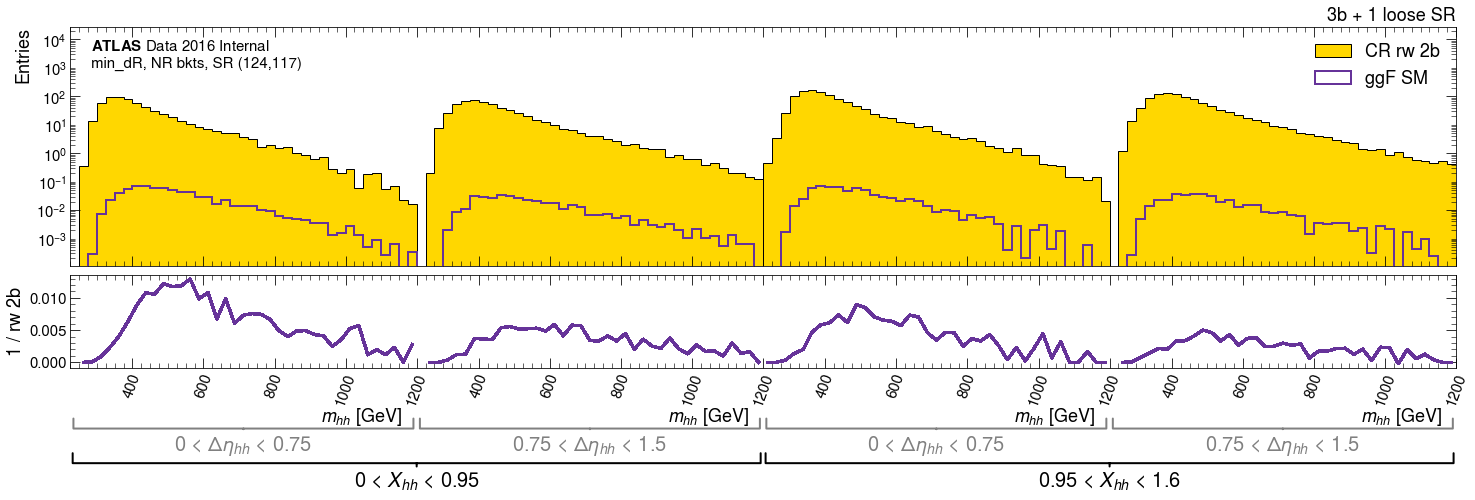

In [89]:
nb = len(eta_edgs)-1
nx = len(Xhh_edgs) - 1

fig, [ax1,ax2] = plt.subplots(2,1,figsize=(6*nb*nx, 6), sharex=True,
                              gridspec_kw={"height_ratios": [.72, .28], 
                                           "hspace":0.05, "left":0.098, "bottom":0.09})

l = bCat_to_label[bcat]

n = 39
r = np.array([225,1200])
dr = r[1]-r[0]

for i, xmin,xmax in zip(range(nx),Xhh_edgs[:-1], Xhh_edgs[1:]):

    mi = (df.X_hh > xmin) & (df.X_hh < xmax) 
    

    for j, eta_min, eta_max in zip(range(nb),eta_edgs[:-1],eta_edgs[1:]):

        
        k = i*nb+j
        
        
        mj = (df.X_wt_tag > 1.5) & mi & (df.dEta_hh > eta_min) & (df.dEta_hh < eta_max)

        m_2b = df[f'rw_to_{bcat}'] & mj
        #m_4b = getBTagMask(df,bcat) & mj


        rk = r + k*dr
        print(k,rk)
        n_2b,ei,_ = ax1.hist(df.loc[m_2b,col] + (k*dr),n,rk, histtype='stepfilled',
                            fc=color,ec='k',label='CR rw 2b' if k==0 else None,
                            weights=df.loc[m_2b,f'w_2{ii}'],log=log)
        if k == 0:
            e = ei

        n_VR = np.histogram(df.loc[m_2b,col] + (k*dr),n,rk,
                            weights=df.loc[m_2b,f'w_2{ii}_VR'])[0]

        xx = 0.5 * (ei[1:] + ei[:-1])

#         bs = calc_bstrap(df[m_2b], col, yr, norm, norm_IQR,e)
#         w_2b = np.sqrt(np.histogram(df.loc[m_2b,col].values, e, weights=df.loc[m_2b,f'w_2{ii}'].values**2)[0])

#         err = np.sqrt( (n_2b-n_VR)**2 + bs**2 + w_2b**2)

#         ax1.fill_between(ei,[0]+list(n_2b-err),[0]+list(n_2b+err), 
#                          step='pre',facecolor='None',edgecolor='dimgrey', 
#                          hatch='\\\\\\\\', linewidth=0,zorder=5) 

#         n_4b = np.histogram(df.loc[m_4b,col] + (k*dr),n,rk)[0]

#         ax1.errorbar(xx,n_4b,np.sqrt(n_4b),label=l if k==0 else None,
#                      color='k',marker='o',lw=0,elinewidth=2)

        # 
        smask = (sm.kinematic_region==0) &  getBTagMask(sm,bcat) 
        smask = smask & (sm.dEta_hh > eta_min) & (sm.dEta_hh < eta_max)
        smask = smask & (sm.X_hh > xmin) & (sm.X_hh < xmax)

        s = np.histogram(sm.loc[smask,col],n,r,weights=sm.loc[smask,'mc_sf'])[0]

        ax1.hist(xx,ei,histtype='step',color='rebeccapurple',
                 lw=2,label=f'ggF SM' if k == 0 else None,
                 weights=s)
    
        ax2.plot(xx,s/np.sqrt(n_2b),'rebeccapurple')
        
        
ax2.set_xlim(r[0],rk[1])
#ax2.set_ylim(0.5,1.5)
    
start,stop = np.log10(ax1.get_ylim())
ax1.yaxis.set_minor_locator(LogLocator(base=10,subs=[1.,2.,3.,4.,5.,6.,7.,8.,9.],
                                       numticks=20))
ax1.set_ylim(np.power(10,start),np.power(10, stop + 0.3*(stop-start)))
    
ax2.xaxis.set_minor_locator(MultipleLocator(25))

ml = np.array([400,600,800,1000,1200])
mls = []
for k in range(nb*nx):
    mls += list(ml+k*dr)
    
ax2.xaxis.set_major_locator(FixedLocator(mls))

xticklocs = ax2.xaxis.get_majorticklocs()

xlabels = [f'{xtl:.0f}' for xtl in ml]*nb*nx
ax2.set_xticklabels(xlabels,rotation=70)

'''
Annotate the axes
'''
for i, xmin,xmax in zip(range(nx),Xhh_edgs[:-1],Xhh_edgs[1:]):
    
    
    for j,xl,eta_min, eta_max in zip(range(nb),np.arange(1,nx*nb+1)/(nx*nb),
                                     eta_edgs[:-1],eta_edgs[1:]):

        k = i * nx + j
        
        xl = (k + 1) / (nx*nb)
        
        rk = r + (k*dr)

        tj = f'{eta_min}' + ' < $\Delta \eta_{hh}$ < ' + f'{eta_max}'
        r_avg = rk.mean()

        ax2.text(xl-.01,-0.4,'$m_{hh}$ [GeV]',fontsize=18,transform=ax2.transAxes,ha='right',va='top')

        ax2.annotate(tj, xy=(r_avg, -0.65), xytext=(r_avg, -0.7), 
                     xycoords=('data','axes fraction'), 
                     fontsize=20, ha='center', va='top',color='grey',
                     arrowprops=dict(arrowstyle='-[, widthB=8.5, lengthB=0.5',
                                     color='grey', lw=2.0))
        
    ti = f'{xmin}' + ' < $X_{hh}$ < ' + f'{xmax}'
    
    ax2.annotate(ti, xy=(r[0] + dr*k, -1), xytext=(r[0] + dr*k, -1.1), 
             xycoords=('data','axes fraction'), 
             fontsize=20, ha='center', va='top',
             arrowprops=dict(arrowstyle='-[, widthB=17.2, lengthB=0.5', lw=2.0))

    
ax1.legend(loc='upper right',fontsize=18)
ax1.set_ylabel('Entries',fontsize=18,loc='top')
ax2.set_ylabel('1 / rw 2b',fontsize=18)
ax1.set_title(f'{l} SR',loc='right')

fig.text(0.015,.95,text,ha='left',va='top',transform=ax1.transAxes,fontsize=15)

plt.show()

In [ ]:
norm

In [10]:
norm_VR

1.0098124501066998

In [11]:
np.sum((dat.X_wt_tag > 1.5) & (dat.kinematic_region==2) & (dat.rw_to_3b1f))

978386

**Question:** How do I apply these things??

I.e, normally we would apply the mc_sf to get the $t\bar{t}$ weights, but to I just *ignore* this now since Sean has the 4-tag shennanigans atm?


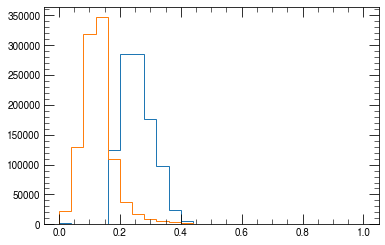

In [12]:
plt.hist(ah.loc[ah.rw_to_3b1f,'mc_sf'],25,(0,1),histtype='step')
plt.hist(ah.loc[ah.rw_to_3b1f,'NN_d231f_weight_bstrap_med_16'],
         25,(0,1),histtype='step')
plt.show()

## Normalization constraints

Trying to adapt the procedure from the 2015 + 2016 analysis to constrain the $t\bar{t}$ normalization with the data.

\begin{eqnarray}
D^{SR 4b} = & \ R^{CR} (D_{QCD}^{SR 2b}) N^{CR} \mu_{QCD} + R^{CR}(D_{ah \ tt}^{SR 2b}) N^{CR} + R^{CR}(D_{sl \ tt}^{SR 2b}) N^{CR} \\
& - R^{CR}(MC_{ah \ tt}) \alpha_{ah tt}^{CR 2b} - R^{CR}(MC_{sl \ tt}) \alpha_{sl tt}^{CR 2b} \\
& +MC_{ah \ tt} \alpha_{ah tt}^{CR 2b} + MC_{sl \ tt} \alpha_{sl tt}^{CR 2b}
\end{eqnarray}


To do this we need two normalization corrections:
1. To constrain the 2b $t\bar{t}$ normalization for the mc templates that we're subtracting from data

For the 2b semilep, can normalize the tempate us (what the previous analysis did).

Reminder: in the last iter of the analysis, they didn't have enough $t\bar{t}$ stats to use 4b $t\bar{t}$ directly, so I'm not sure how to connect the pieces of these analogies for subtracting off the 2b pieces. 

2. To constrain the normalization of the bits we're adding back in.

Like a combined fit for $\mu_{QCD}^{CR}$, $\alpha_{ah\ tt}^{CR 4b}$, $\alpha_{sl\ tt}^{CR 4b}$ using 3 regions:
1. 1 isolated muon w/ $p_T$ > 25 GeV  (semi-lep tt enriched)
2. $X_{wt}$ < 0.75 (all-had tt enriched)
3. $X_{wt}$ > 0.75 (qcd enriched)

## Semi-lep treatment

**Step 1:** Use the $\mu$ to constrain 2b?

There seeems to be some inconsistency w/ whether or not to include the X_wt_tag veto b/w the int note + Patrick's thesis.


But for 2015, the SFs are pretty close to 1, so I might actually just ignore this it.


In [13]:
sl.columns

Index(['pass_vbf_sel', 'ntag', 'njets', 'X_hh', 'kinematic_region', 'm_hh',
       'minQ', 'X_wt_tag', 'passMuonIso', 'NN_d231f_weight_bstrap_med_16',
       'NN_d231f_weight_bstrap_IQR_16', 'rw_to_3b1f',
       'NN_d231f_weight_VRderiv_bstrap_med_16',
       'NN_d231f_weight_VRderiv_bstrap_IQR_16', 'mc_sf', 'w_231f',
       'w_231f_VR'],
      dtype='object')

0.8592622215463825 0.010393931673042794
0.8467278479654443 0.018049259182206588


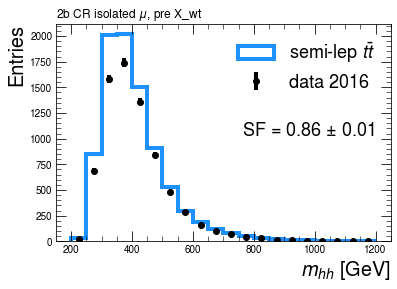

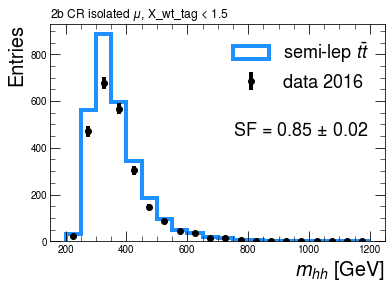

In [14]:
'''
Before the X_wt isolating cut
'''
sl_mask = (sl.ntag==2)& sl.passMuonIso & ~sl.pass_vbf_sel & (sl.kinematic_region==2)
dat_mask = (dat.ntag==2)& dat.passMuonIso & ~dat.pass_vbf_sel & (dat.kinematic_region==2)

plt.figure()
h_sl,e,_ = plt.hist(sl.loc[sl_mask,'m_hh'],20,(200,1200),
                  color='dodgerblue',histtype='step',lw=4,
                  label=r'semi-lep $t\bar{t}$',weights=sl.loc[sl_mask,'mc_sf'])

n_2b = np.histogram(dat.loc[dat_mask,'m_hh'],e)[0]

xx = 0.5 * (e[1:] + e[:-1])
plt.errorbar(xx,n_2b,np.sqrt(n_2b),color='k',lw=0,elinewidth=4,
             marker='o',label=f'data 20{yr}')

plt.legend(fontsize=18)
plt.xlabel('$m_{hh}$ [GeV]',x=1,ha='right',fontsize=20)
plt.ylabel('Entries',y=1,ha='right',fontsize=20)
plt.title('2b CR isolated $\mu$, pre X_wt',loc='left')

mcs = sl.loc[sl_mask,'mc_sf'].values

r = np.sum(dat_mask)/np.sum(mcs)
dr = r * np.sqrt( 1/np.sum(dat_mask)  + np.sum(mcs**2)/ np.sum(mcs)**2  )
print(r,dr)

text = f'SF = {r:.2f} $\pm$ {dr:.2f}'

ax = plt.gca()
plt.text(.95,.55,text,ha='right',va='top',fontsize=18,transform=ax.transAxes)

plt.savefig(f'{figDir}/sl_2b_CR_isoMuon_pre_X_wt.pdf',bbox_inches='tight')


'''
Before the X_wt isolating cut
'''
sl_mask = sl_mask & (sl.X_wt_tag < 1.5)
dat_mask = dat_mask & (dat.X_wt_tag < 1.5)

plt.figure()
h_sl = plt.hist(sl.loc[sl_mask,'m_hh'],e,
         color='dodgerblue',histtype='step',lw=4,
         label=r'semi-lep $t\bar{t}$',weights=sl.loc[sl_mask,'mc_sf'])[0]

n_2b = np.histogram(dat.loc[dat_mask,'m_hh'],e)[0]

plt.errorbar(xx,n_2b,np.sqrt(n_2b),color='k',lw=0,elinewidth=4,
             marker='o',label=f'data 20{yr}')

plt.legend(fontsize=18)
plt.xlabel('$m_{hh}$ [GeV]',x=1,ha='right',fontsize=20)
plt.ylabel('Entries',y=1,ha='right',fontsize=20)
plt.title('2b CR isolated $\mu$, X_wt_tag < 1.5',loc='left')


mcs = sl.loc[sl_mask,'mc_sf'].values

r = np.sum(dat_mask)/np.sum(mcs)
dr = r * np.sqrt( 1/np.sum(dat_mask)  + np.sum(mcs**2)/ np.sum(mcs)**2  )
print(r,dr)

text = f'SF = {r:.2f} $\pm$ {dr:.2f}'

ax = plt.gca()
plt.text(.95,.55,text,ha='right',va='top',fontsize=18,transform=ax.transAxes)

plt.savefig(f'{figDir}/sl_2b_CR_isoMuon_X_wt_lt_1.5.pdf',bbox_inches='tight')

plt.show()

**Check the $X_{wt}$ dists for the regions we can unblind in this semi-lep CR**

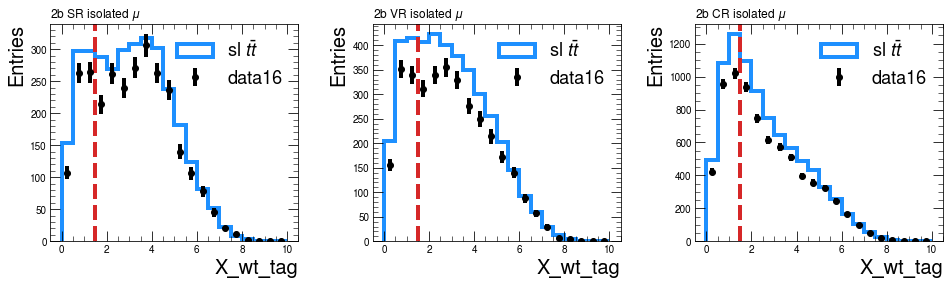

In [15]:
fig,axes = plt.subplots(1,3,figsize=(16,4),gridspec_kw={'wspace':.3})

for i, ax, region in zip(range(3),axes,['SR','VR','CR']):

    
    sl_mask = (sl.ntag==2)& sl.passMuonIso & ~sl.pass_vbf_sel & (sl.kinematic_region==i)
    dat_mask = (dat.ntag==2)& dat.passMuonIso & ~dat.pass_vbf_sel & (dat.kinematic_region==i)
    
    h_sl,e,_ = ax.hist(sl.loc[sl_mask,'X_wt_tag'],20,(0,10),
                      color='dodgerblue',histtype='step',lw=4,
                      label=r'sl $t\bar{t}$',weights=sl.loc[sl_mask,'mc_sf'])

    n_2b = np.histogram(dat.loc[dat_mask,'X_wt_tag'],e)[0]

    xx = 0.5 * (e[1:] + e[:-1])
    ax.errorbar(xx,n_2b,np.sqrt(n_2b),color='k',lw=0,elinewidth=4,
                 marker='o',label=f'data{yr}')

    ax.legend(fontsize=18)
    ax.set_xlabel('X_wt_tag',x=1,ha='right',fontsize=20)
    ax.set_ylabel('Entries',y=1,ha='right',fontsize=20)
    ax.set_title(f'2b {region} isolated $\mu$',loc='left')
    
    # draw the cut
    ylim = ax.get_ylim()
    ax.plot([1.5]*2,ylim,'C3',ls='--',lw=4)
    ax.set_ylim(ylim)
    
fig.subplots_adjust()
plt.show()

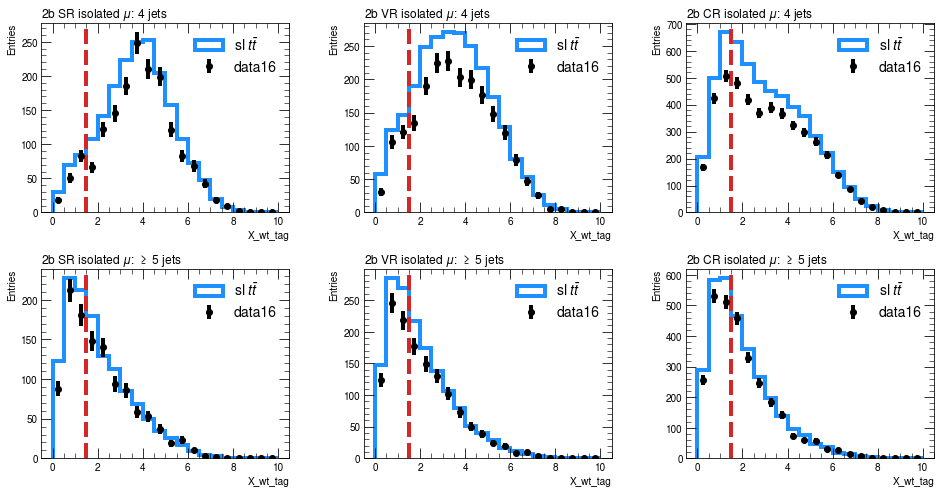

In [16]:
fig,axes = plt.subplots(2,3,figsize=(16,8),
                        gridspec_kw={'wspace':.3,'hspace':.3})

for axs,njets in zip(axes,[4,5]):

    sl_mask = (sl.ntag==2)& sl.passMuonIso & ~sl.pass_vbf_sel 
    dat_mask = (dat.ntag==2)& dat.passMuonIso & ~dat.pass_vbf_sel

    if njets==4:
        sl_mask = sl_mask & (sl.njets==njets)
        dat_mask = dat_mask & (dat.njets==njets)
        
        title = f'{njets} jets'
        
    else:
        sl_mask = sl_mask & (sl.njets>=njets)
        dat_mask = dat_mask & (dat.njets>=njets) 
        
        title = f'$\geq$ {njets} jets'
        
    for i, ax, region in zip(range(3),axs,['SR','VR','CR']):
    
        h_sl,e,_ = ax.hist(sl.loc[sl_mask& (sl.kinematic_region==i),'X_wt_tag'],
                           20,(0,10), color='dodgerblue',
                           histtype='step',lw=4,label=r'sl $t\bar{t}$',
                           weights=sl.loc[sl_mask& (sl.kinematic_region==i),'mc_sf'])

        n_2b = np.histogram(dat.loc[dat_mask& (dat.kinematic_region==i),'X_wt_tag'],e)[0]

        xx = 0.5 * (e[1:] + e[:-1])
        ax.errorbar(xx,n_2b,np.sqrt(n_2b),color='k',lw=0,elinewidth=4,
                    marker='o',label=f'data{yr}')

        ax.legend()
        ax.set_xlabel('X_wt_tag',x=1,ha='right')
        ax.set_ylabel('Entries',y=1,ha='right')
        ax.set_title(f'2b {region} isolated $\mu$: {title}',loc='left')

        # draw the cut
        ylim = ax.get_ylim()
        ax.plot([1.5]*2,ylim,'C3',ls='--',lw=4)
        ax.set_ylim(ylim)
    
fig.subplots_adjust()
plt.show()

## Some of the corresponding 3b + 1 fail plots

0.976673073785553 0.03191642691019272
0.9792873161494637 0.04889987498089763


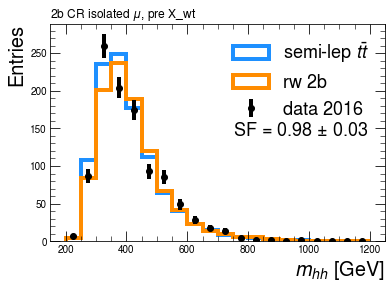

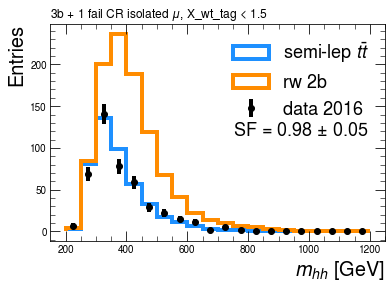

In [17]:
'''
Before the X_wt isolating cut
'''
sl_mask = (sl.ntag==3)&(sl.minQ==1)& sl.passMuonIso & ~sl.pass_vbf_sel & (sl.kinematic_region==2)
dat_mask = (dat.ntag==3)& (dat.minQ==1)& dat.passMuonIso & ~dat.pass_vbf_sel & (dat.kinematic_region==2)
rw_mask = dat.rw_to_3b1f & dat.passMuonIso & ~dat.pass_vbf_sel & (dat.kinematic_region==2)

plt.figure()
h_sl,e,_ = plt.hist(sl.loc[sl_mask,'m_hh'],20,(200,1200),
                  color='dodgerblue',histtype='step',lw=4,
                  label=r'semi-lep $t\bar{t}$',weights=sl.loc[sl_mask,'mc_sf'])


rw_2b = plt.hist(dat.loc[rw_mask,'m_hh'],e,
                 color='darkorange',histtype='step',lw=4,
                 label=r'rw 2b',
                 weights=dat.loc[rw_mask,f'NN_d231f_weight_bstrap_med_{yr}'])[0]

n_2b = np.histogram(dat.loc[dat_mask,'m_hh'],e)[0]

xx = 0.5 * (e[1:] + e[:-1])
plt.errorbar(xx,n_2b,np.sqrt(n_2b),color='k',lw=0,elinewidth=4,
             marker='o',label=f'data 20{yr}')

plt.legend(fontsize=18)
plt.xlabel('$m_{hh}$ [GeV]',x=1,ha='right',fontsize=20)
plt.ylabel('Entries',y=1,ha='right',fontsize=20)
plt.title('2b CR isolated $\mu$, pre X_wt',loc='left')

mcs = sl.loc[sl_mask,'mc_sf'].values

r = np.sum(dat_mask)/np.sum(mcs)
dr = r * np.sqrt( 1/np.sum(dat_mask)  + np.sum(mcs**2)/ np.sum(mcs)**2  )
print(r,dr)

text = f'SF = {r:.2f} $\pm$ {dr:.2f}'

ax = plt.gca()
plt.text(.95,.55,text,ha='right',va='top',fontsize=18,transform=ax.transAxes)


'''
Before the X_wt isolating cut
'''
sl_mask = sl_mask & (sl.X_wt_tag < 1.5)
dat_mask = dat_mask & (dat.X_wt_tag < 1.5)

plt.figure()
h_sl = plt.hist(sl.loc[sl_mask,'m_hh'],e,
         color='dodgerblue',histtype='step',lw=4,
         label=r'semi-lep $t\bar{t}$',weights=sl.loc[sl_mask,'mc_sf'])[0]

rw_2b = plt.hist(dat.loc[rw_mask,'m_hh'],e,
                 color='darkorange',histtype='step',lw=4,
                 label=r'rw 2b',
                 weights=dat.loc[rw_mask,f'NN_d231f_weight_bstrap_med_{yr}'])[0]

n_2b = np.histogram(dat.loc[dat_mask,'m_hh'],e)[0]

plt.errorbar(xx,n_2b,np.sqrt(n_2b),color='k',lw=0,elinewidth=4,
             marker='o',label=f'data 20{yr}')

plt.legend(fontsize=18)
plt.xlabel('$m_{hh}$ [GeV]',x=1,ha='right',fontsize=20)
plt.ylabel('Entries',y=1,ha='right',fontsize=20)
plt.title('3b + 1 fail CR isolated $\mu$, X_wt_tag < 1.5',loc='left')


mcs = sl.loc[sl_mask,'mc_sf'].values

r = np.sum(dat_mask)/np.sum(mcs)
dr = r * np.sqrt( 1/np.sum(dat_mask)  + np.sum(mcs**2)/ np.sum(mcs)**2  )
print(r,dr)

text = f'SF = {r:.2f} $\pm$ {dr:.2f}'

ax = plt.gca()
plt.text(.95,.55,text,ha='right',va='top',fontsize=18,transform=ax.transAxes)

plt.show()

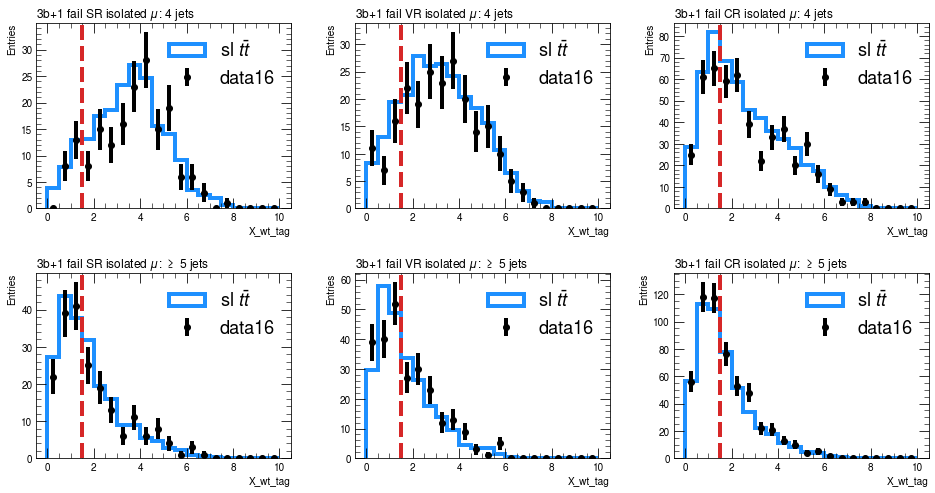

In [18]:
fig,axes = plt.subplots(2,3,figsize=(16,8),
                        gridspec_kw={'wspace':.25,'hspace':.35})

for axs,njets in zip(axes,[4,5]):

    sl_mask = (sl.ntag==3)& (sl.minQ==1)&sl.passMuonIso & ~sl.pass_vbf_sel 
    dat_mask = (dat.ntag==3)&(dat.minQ==1)& dat.passMuonIso & ~dat.pass_vbf_sel

    if njets==4:
        sl_mask = sl_mask & (sl.njets==njets)
        dat_mask = dat_mask & (dat.njets==njets)
        
        title = f'{njets} jets'
        
    else:
        sl_mask = sl_mask & (sl.njets>=njets)
        dat_mask = dat_mask & (dat.njets>=njets) 
        
        title = f'$\geq$ {njets} jets'
        
    for i, ax, region in zip(range(3),axs,['SR','VR','CR']):
    
        h_sl,e,_ = ax.hist(sl.loc[sl_mask& (sl.kinematic_region==i),'X_wt_tag'],
                           20,(0,10), color='dodgerblue',
                           histtype='step',lw=4,label=r'sl $t\bar{t}$',
                           weights=sl.loc[sl_mask& (sl.kinematic_region==i),'mc_sf'])

        n_2b = np.histogram(dat.loc[dat_mask& (dat.kinematic_region==i),'X_wt_tag'],e)[0]

        xx = 0.5 * (e[1:] + e[:-1])
        ax.errorbar(xx,n_2b,np.sqrt(n_2b),color='k',lw=0,elinewidth=4,
                    marker='o',label=f'data{yr}')

        ax.legend(fontsize=18)
        ax.set_xlabel('X_wt_tag',x=1,ha='right')
        ax.set_ylabel('Entries',y=1,ha='right')
        ax.set_title(f'3b+1 fail {region} isolated $\mu$: {title}',loc='left')

        # draw the cut
        ylim = ax.get_ylim()
        ax.plot([1.5]*2,ylim,'C3',ls='--',lw=4)
        ax.set_ylim(ylim)
    
fig.subplots_adjust()
plt.show()

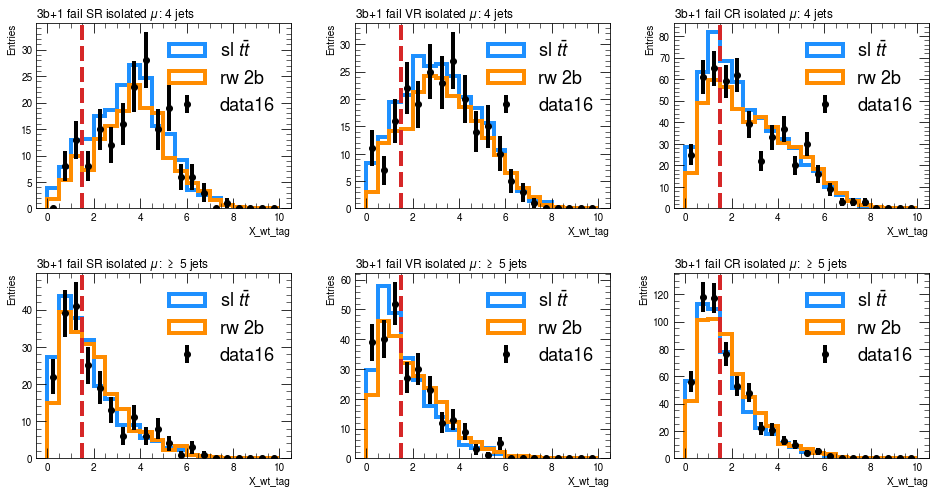

In [19]:
fig,axes = plt.subplots(2,3,figsize=(16,8),
                        gridspec_kw={'wspace':.25,'hspace':.35})

for axs,njets in zip(axes,[4,5]):

    sl_mask = (sl.ntag==3)& (sl.minQ==1)&sl.passMuonIso & ~sl.pass_vbf_sel 
    dat_mask = (dat.ntag==3)&(dat.minQ==1)& dat.passMuonIso & ~dat.pass_vbf_sel
    rw_mask = dat.rw_to_3b1f & dat.passMuonIso & ~dat.pass_vbf_sel
    
    if njets==4:
        sl_mask = sl_mask & (sl.njets==njets)
        dat_mask = dat_mask & (dat.njets==njets)
        rw_mask = rw_mask & (dat.njets == njets)
        title = f'{njets} jets'
        
    else:
        sl_mask = sl_mask & (sl.njets>=njets)
        dat_mask = dat_mask & (dat.njets>=njets) 
        rw_mask = rw_mask & (dat.njets >= njets)
        
        title = f'$\geq$ {njets} jets'
        
    for i, ax, region in zip(range(3),axs,['SR','VR','CR']):
    
        h_sl,e,_ = ax.hist(sl.loc[sl_mask& (sl.kinematic_region==i),'X_wt_tag'],
                           20,(0,10), color='dodgerblue',
                           histtype='step',lw=4,label=r'sl $t\bar{t}$',
                           weights=sl.loc[sl_mask& (sl.kinematic_region==i),'mc_sf'])

        rw_2b = ax.hist(dat.loc[rw_mask& (dat.kinematic_region==i),'X_wt_tag'],e,
                        color='darkorange',histtype='step',lw=4,label=r'rw 2b',
                         weights=dat.loc[rw_mask& (dat.kinematic_region==i),
                                         f'NN_d231f_weight_bstrap_med_{yr}'])[0]
        
        n_2b = np.histogram(dat.loc[dat_mask& (dat.kinematic_region==i),'X_wt_tag'],e)[0]

        xx = 0.5 * (e[1:] + e[:-1])
        ax.errorbar(xx,n_2b,np.sqrt(n_2b),color='k',lw=0,elinewidth=4,
                    marker='o',label=f'data{yr}')

        ax.legend(fontsize=18)
        ax.set_xlabel('X_wt_tag',x=1,ha='right')
        ax.set_ylabel('Entries',y=1,ha='right')
        ax.set_title(f'3b+1 fail {region} isolated $\mu$: {title}',loc='left')

        # draw the cut
        ylim = ax.get_ylim()
        ax.plot([1.5]*2,ylim,'C3',ls='--',lw=4)
        ax.set_ylim(ylim)
    
fig.subplots_adjust()
plt.show()

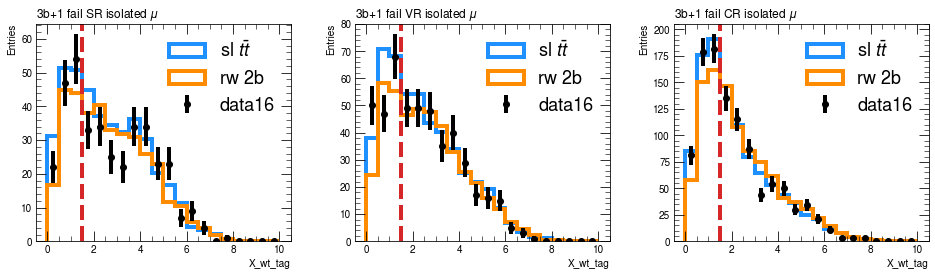

In [20]:
fig,axes = plt.subplots(1,3,figsize=(16,4), gridspec_kw={'wspace':.25})



for i, ax, region in zip(range(3),axes,['SR','VR','CR']):
    
        
    sl_mask = (sl.ntag==3)& (sl.minQ==1)&sl.passMuonIso & ~sl.pass_vbf_sel & (sl.kinematic_region==i)
    dat_mask = (dat.ntag==3)&(dat.minQ==1)& dat.passMuonIso & ~dat.pass_vbf_sel & (dat.kinematic_region==i)
    rw_mask = dat.rw_to_3b1f & dat.passMuonIso & ~dat.pass_vbf_sel& (dat.kinematic_region==i)
        

    h_sl,e,_ = ax.hist(sl.loc[sl_mask,'X_wt_tag'], 20,(0,10), color='dodgerblue',
                       histtype='step',lw=4,label=r'sl $t\bar{t}$',weights=sl.loc[sl_mask,'mc_sf'])

    rw_2b = ax.hist(dat.loc[rw_mask,'X_wt_tag'],e, color='darkorange',histtype='step',lw=4,label=r'rw 2b',
                     weights=dat.loc[rw_mask, f'NN_d231f_weight_bstrap_med_{yr}'])[0]

    n_2b = np.histogram(dat.loc[dat_mask& (dat.kinematic_region==i),'X_wt_tag'],e)[0]

    xx = 0.5 * (e[1:] + e[:-1])
    ax.errorbar(xx,n_2b,np.sqrt(n_2b),color='k',lw=0,elinewidth=4,
                marker='o',label=f'data{yr}')

    ax.legend(fontsize=18)
    ax.set_xlabel('X_wt_tag',x=1,ha='right')
    ax.set_ylabel('Entries',y=1,ha='right')
    ax.set_title(f'3b+1 fail {region} isolated $\mu$',loc='left')

    # draw the cut
    ylim = ax.get_ylim()
    ax.plot([1.5]*2,ylim,'C3',ls='--',lw=4)
    ax.set_ylim(ylim)
    
plt.show()

**Sanity check the normalizations**

In [21]:
sl_mask = (sl.ntag==3)& (sl.minQ==1)& ~sl.pass_vbf_sel & (sl.kinematic_region==2)
dat_mask = (dat.ntag==3)&(dat.minQ==1)& ~dat.pass_vbf_sel & (dat.kinematic_region==2)
rw_mask = dat.rw_to_3b1f & ~dat.pass_vbf_sel& (dat.kinematic_region==2)

In [22]:
np.sum(dat_mask & (dat.X_wt_tag > 1.5))

104738

In [23]:
np.sum(dat.loc[rw_mask & (dat.X_wt_tag > 1.5),f'NN_d231f_weight_bstrap_med_{yr}'])

103512.29599218005

In [24]:
np.sum(dat_mask),np.sum(dat.loc[rw_mask,f'NN_d231f_weight_bstrap_med_{yr}'])

(138251, 132172.2707626163)

In [25]:
np.sum(dat_mask)/np.sum(dat.loc[rw_mask,f'NN_d231f_weight_bstrap_med_{yr}'])

1.0459909571221728

Ok, so as Sean explained, although these include events before the $X_{wt}$ cut, the backgrounds are derived completely *after* the $X_{wt}$ cut, amounting  to an $\approx$ 3% difference (interesting).

## All-had treatment

Ok, so *remember*, these "enriched" regions are derived completely w/r.t. inverting the $X_{wt}$ cut.

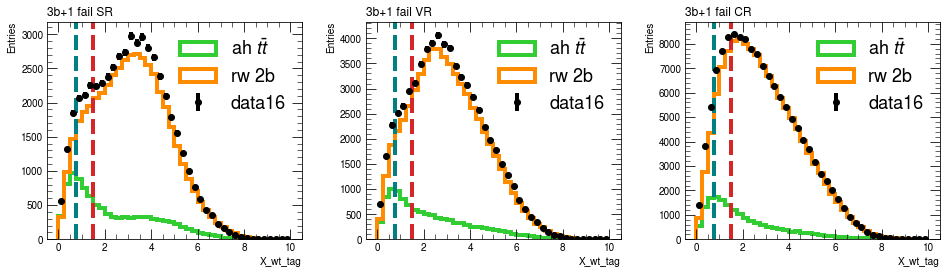

In [26]:
fig,axes = plt.subplots(1,3,figsize=(16,4), gridspec_kw={'wspace':.25})

for i, ax, region in zip(range(3),axes,['SR','VR','CR']):
    
    ah_mask = (ah.ntag==3)& (ah.minQ==1) & ~ah.pass_vbf_sel & (ah.kinematic_region==i)
    dat_mask = (dat.ntag==3)&(dat.minQ==1) & ~dat.pass_vbf_sel & (dat.kinematic_region==i)
    rw_mask = dat.rw_to_3b1f & ~dat.pass_vbf_sel& (dat.kinematic_region==i)
        

    h_ah,e,_ = ax.hist(ah.loc[ah_mask,'X_wt_tag'], 40,(0,10), color='limegreen',
                       histtype='step',lw=4,label=r'ah $t\bar{t}$',weights=ah.loc[ah_mask,'mc_sf'])

    rw_2b = ax.hist(dat.loc[rw_mask,'X_wt_tag'],e, color='darkorange',histtype='step',lw=4,label=r'rw 2b',
                     weights=dat.loc[rw_mask, f'NN_d231f_weight_bstrap_med_{yr}'])[0]

    n_2b = np.histogram(dat.loc[dat_mask& (dat.kinematic_region==i),'X_wt_tag'],e)[0]

    xx = 0.5 * (e[1:] + e[:-1])
    ax.errorbar(xx,n_2b,np.sqrt(n_2b),color='k',lw=0,elinewidth=4,
                marker='o',label=f'data{yr}')

    ax.legend(fontsize=18)
    ax.set_xlabel('X_wt_tag',x=1,ha='right')
    ax.set_ylabel('Entries',y=1,ha='right')
    ax.set_title(f'3b+1 fail {region}',loc='left')

    # draw the cut
    ylim = ax.get_ylim()
    ax.plot([1.5]*2,ylim,'C3',ls='--',lw=4)
    ax.set_ylim(ylim)
    
    ylim = ax.get_ylim()
    ax.plot([0.75]*2,ylim,'teal',ls='--',lw=4)
    ax.set_ylim(ylim)
    
plt.show()

Ok, I think this seems $\approx$ sensible.

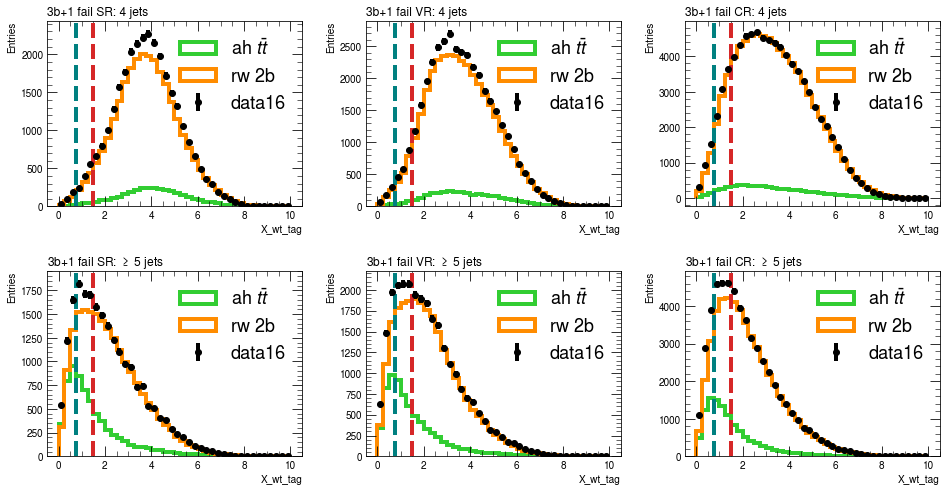

In [27]:
fig,axes = plt.subplots(2,3,figsize=(16,8),
                        gridspec_kw={'wspace':.25,'hspace':.35})

for axs,njets in zip(axes,[4,5]):

    ah_mask = (ah.ntag==3)& (ah.minQ==1) & ~ah.pass_vbf_sel 
    dat_mask = (dat.ntag==3)&(dat.minQ==1) & ~dat.pass_vbf_sel
    rw_mask = dat.rw_to_3b1f & ~dat.pass_vbf_sel

    if njets==4:
        ah_mask = ah_mask & (ah.njets==njets)
        dat_mask = dat_mask & (dat.njets==njets)
        rw_mask = rw_mask & (dat.njets == njets)
        title = f'{njets} jets'
        
    else:
        ah_mask = ah_mask & (ah.njets>=njets)
        dat_mask = dat_mask & (dat.njets>=njets) 
        rw_mask = rw_mask & (dat.njets >= njets)
        
        title = f'$\geq$ {njets} jets'
        
    for i, ax, region in zip(range(3),axs,['SR','VR','CR']):
    
        h_ah,e,_ = ax.hist(ah.loc[ah_mask & (ah.kinematic_region==i),'X_wt_tag'], 
                           40,(0,10), color='limegreen',
                           histtype='step',lw=4,label=r'ah $t\bar{t}$',
                           weights=ah.loc[ah_mask& (ah.kinematic_region==i),'mc_sf'])

        rw_2b = ax.hist(dat.loc[rw_mask& (dat.kinematic_region==i),'X_wt_tag'],
                        e, color='darkorange',histtype='step',lw=4,label=r'rw 2b',
                        weights=dat.loc[rw_mask & (dat.kinematic_region==i), 
                                        f'NN_d231f_weight_bstrap_med_{yr}'])[0]

        n_2b = np.histogram(dat.loc[dat_mask& (dat.kinematic_region==i),'X_wt_tag'],e)[0]

        xx = 0.5 * (e[1:] + e[:-1])
        ax.errorbar(xx,n_2b,np.sqrt(n_2b),color='k',lw=0,elinewidth=4,
                    marker='o',label=f'data{yr}')

        ax.legend(fontsize=18)
        ax.set_xlabel('X_wt_tag',x=1,ha='right')
        ax.set_ylabel('Entries',y=1,ha='right')
        ax.set_title(f'3b+1 fail {region}: {title}',loc='left')

        # draw the cut
        ylim = ax.get_ylim()
        ax.plot([1.5]*2,ylim,'C3',ls='--',lw=4)
        ax.set_ylim(ylim)

        ylim = ax.get_ylim()
        ax.plot([0.75]*2,ylim,'teal',ls='--',lw=4)
        ax.set_ylim(ylim)
    
fig.subplots_adjust()
plt.show()

**Conclusion:** All-had is *way* more of the story it seems, and will be driving the lower X_wt_tag distrubution values for the higher njets rgions.

**Next:** Do a *combined* normalization fit in the $CR$

To understand how this works, I actually ended up revising Sean's slides from the OG 4b mini-workshop!

**Step 1:** Get the yield for the 2b QCD prediction


In [28]:
# Set up the masks
ah_mask  = (ah.ntag==2) &  ~ah.pass_vbf_sel & ( ah.kinematic_region==2)
sl_mask  = (sl.ntag==2) &  ~sl.pass_vbf_sel & ( sl.kinematic_region==2)
dat_mask = (dat.ntag==2)& ~dat.pass_vbf_sel & (dat.kinematic_region==2)

# Get the yields
N_dat_2b_CR = np.sum(dat_mask)

N_ah_2b_CR = np.sum(ah.loc[ah_mask,'mc_sf'])

SF_sl_2b_CR = np.sum(dat_mask & dat.passMuonIso ) / np.sum(sl.loc[sl_mask & sl.passMuonIso,'mc_sf'].values)
N_sl_2b_CR = np.sum(sl.loc[sl_mask,'mc_sf'])

I think I want this to be my 2b QCD yield.

In [29]:
N_qcd_2b_CR = N_dat_2b_CR - N_ah_2b_CR - SF_sl_2b_CR * N_sl_2b_CR

In [30]:
N_qcd_2b_CR/N_dat_2b_CR

0.8547423662402527

In [31]:
 N_ah_2b_CR/N_dat_2b_CR , SF_sl_2b_CR * N_sl_2b_CR/N_dat_2b_CR

(0.09966689941847136, 0.045590734341276)

In [32]:
SF_sl_2b_CR 

0.8592622215463825

Cool - but ofc, 2b was the easy bit!

Actually... I'm a little bit confused, shouldn't the estimate of the QCD yield take into account the rw est?


In [33]:
dat.columns

Index(['pass_vbf_sel', 'ntag', 'njets', 'X_hh', 'kinematic_region', 'm_hh',
       'minQ', 'X_wt_tag', 'passMuonIso', 'NN_d231f_weight_bstrap_med_16',
       'NN_d231f_weight_bstrap_IQR_16', 'rw_to_3b1f',
       'NN_d231f_weight_VRderiv_bstrap_med_16',
       'NN_d231f_weight_VRderiv_bstrap_IQR_16', 'w_231f', 'w_231f_VR'],
      dtype='object')

In [34]:
n_2b_cr  =dat.loc[dat.rw_to_3b1f& ~dat.pass_vbf_sel & (dat.kinematic_region==2),'NN_d231f_weight_bstrap_med_16'].sum()
n_3b1f_cr=np.sum((dat.ntag==3)& (dat.minQ==1) & ~dat.pass_vbf_sel & (dat.kinematic_region==2))

In [35]:
n_3b1f_cr/n_2b_cr

1.0459909571221728

In [36]:
# Set up the masks
ah_mask  = ah.rw_to_3b1f &  ~ah.pass_vbf_sel & ( ah.kinematic_region==2)
sl_mask  = sl.rw_to_3b1f &  ~sl.pass_vbf_sel & ( sl.kinematic_region==2)
dat_mask = dat.rw_to_3b1f& ~dat.pass_vbf_sel & (dat.kinematic_region==2)

# Get the yields
N_dat_2b_CR = np.sum(dat_mask)

N_ah_2b_CR = np.sum(ah.loc[ah_mask,'mc_sf'])

SF_sl_2b_CR = np.sum(dat_mask & dat.passMuonIso ) / np.sum(sl.loc[sl_mask & sl.passMuonIso,'mc_sf'].values)
N_sl_2b_CR = np.sum(sl.loc[sl_mask,'mc_sf'])

**Step 2:** Get the combined fits yield for the 3b+1 fail predictions

In [37]:
# Set up the masks
ah_mask  = ( ah.ntag==2) &  ~ah.pass_vbf_sel & ( ah.kinematic_region==2)
sl_mask  = ( sl.ntag==2) &  ~sl.pass_vbf_sel & ( sl.kinematic_region==2)
dat_mask = (dat.ntag==2) & ~dat.pass_vbf_sel & (dat.kinematic_region==2)

# Get the yields
N_dat_2b_CR = np.sum(dat_mask)

N_ah_2b_CR = np.sum(ah.loc[ah_mask,'mc_sf'])

SF_sl_2b_CR = np.sum(dat_mask & dat.passMuonIso ) / np.sum(sl.loc[sl_mask & sl.passMuonIso,'mc_sf'].values)
N_sl_2b_CR = np.sum(sl.loc[sl_mask,'mc_sf'])

In [38]:
def enrichRegions(df, kr=2, bcat='3b1f', w_col='mc_sf'):
    '''
    Motivation: For each sample, we want to apply the *same*
    
    Inputs:
    - df: Input df (one / physics sample)
    - kr: kinematic region
        * 2: CR
        * 1: VR
        * 0: SR
    - bmask: b-tagging region, one of
        * 4b
        * 3b1l
        * 3b1f
        * 2b (all the 2b events)
        * rw_to_{4b,3b1l,3b1f}: Subset of the 2b events defining the rw
    - w_col: The column for the weights
        * mc_sf (for ttbar)
        * 'NN_d2{4,3l,3f}_weight_bstrap_med_{yr}' (for reweighted data)
        * None: to j sum the raw event yields
    '''
    
    if bcat == '4b':
        bmask = df.ntag >= 4
    elif bcat == '3b1l':
        bmask = (df.ntag == 3) & (df.minQ == 2)
    elif bcat == '3b1f':
        bmask = (df.ntag == 3) & (df.minQ == 1)
    elif bcat == '2b':
        bmask = df.ntag == 2
    elif 'rw_to_' in bcat:
        bmask =  df[bcat]
    else:
        raise NotImplementedError
    
    mask = df[bmask] & ~df.pass_vbf_sel & (df.kinematic_region==kr)
    
    # Now define the masks for each of the enriched regions
    m_sl  = mask & df.passMuonIso
    m_ah  = mask & (df.X_wt_tag < 0.75)
    m_qcd = mask & (df.X_wt_tag > 0.75)
    
    if w_col == None:
        vals = np.array([
            np.sum(m_sl), np.sum(m_ah), np.sum(m_qcd)
        ])
    else:
        vals = np.array([
            np.sum(df.loc[m_sl, w_col]),
            np.sum(df.loc[m_ah, w_col]),
            np.sum(df.loc[m_qcd,w_col])
        ])
    
    return vals

Ok, cool, let's start *saving* some histograms haha :)

In [39]:
ah.columns

Index(['pass_vbf_sel', 'ntag', 'njets', 'X_hh', 'kinematic_region', 'm_hh',
       'minQ', 'X_wt_tag', 'passMuonIso', 'NN_d231f_weight_bstrap_med_16',
       'NN_d231f_weight_bstrap_IQR_16', 'rw_to_3b1f',
       'NN_d231f_weight_VRderiv_bstrap_med_16',
       'NN_d231f_weight_VRderiv_bstrap_IQR_16', 'mc_sf', 'w_231f',
       'w_231f_VR'],
      dtype='object')

In [40]:
#for bcat in [f'{ti}{bi}' for bi ['4b','3b1f'] for ti in ['','rw_to_']]:

In [44]:
dat['rw_to_3b1f'] & ~dat.pass_vbf_sel & (dat.kinematic_region==kr)

0          False
1          False
2          False
3          False
4          False
           ...  
1341251     True
1341252     True
1341253     True
1341254     True
1341255     True
Length: 2479580, dtype: bool

In [45]:
hist_dict = {}


for df, physSample, w in zip([dat,ah,sl],['dat','ah','sl'],['None','mc_sf','mc_sf']):
        
    for kr, region in zip([2,1,0],['cr','vr','sr']):
        
        k = f'{physSample}_{region}'

        hist_dict[f'{k}_2b']   = enrichRegions(df, kr=kr, bcat='rw_to_3b1f', w_col=w)
        hist_dict[f'{k}_3b1f'] = enrichRegions(df, kr=kr, bcat='3b1f', w_col=w)
        hist_dict[f'{k}_rw_to_3b1f'] = enrichRegions(df, kr=kr, bcat='rw_to_3b1f', 
                                                     w_col='NN_d231f_weight_bstrap_med_16')


MemoryError: Unable to allocate 39.4 TiB for an array with shape (2479580, 2186357) and data type float64

In [ ]:
hist_dict

**Then:** Get an *uncertainty* on this normalization in the VR

(Already taken care of by the for loop above.)

**Finally:** Get the *limits* + c.f. w/ our baseline strategy!

It should be *straight-forward* to get limits with just 2016.




### Assumptions

1. The shapes for R^{CR}(D^{SR 2b})
2. That the isolated $\mu$ control sample gives us a handle on the normalizations
    Systematic associated: Rederiving the normalizations in the VR
2. ?




### Do we need systematical uncertainties for $t\bar{t}$?

- Patrick made some extreme variations for $t\bar{t}$, but since the QCD model correspondingly compensates for the discrepancy in $t\bar{t}$ and data, he saw that the $t\bar{t}$ variations were *well* within the discrepancy from the $t\bar{t}$ variations. (So I think these normalization bits were the only $t\bar{t}$ unc that they included - **but I will double check the statistical analysis section**)

### How to validate?
 
Ofc, we're excited about 3b not loose rn!

But also, the lower left quadrant of the massplane has quite a bit of $t\bar{t}$ (and Rui saw that it was the "problem child" of the fit), so this might be a good place to "stress test" haha :)